## 매출 예상
### Data 구성 테이블
- T_DayAccountAccBill
- GuildMemberHistory
- Guild

### 1. Collecting the data

In [93]:
import pandas as pd
import datetime

print ( datetime.datetime.now())

train1  =  pd.read_csv('input/train_201706.csv')

test = pd.read_csv('input/test.csv')

print ( datetime.datetime.now())

2018-04-20 14:57:42.883160
2018-04-20 14:57:55.100669


In [94]:
train1.head()

,DateID,AccountUniqueID,GuildIndex,GWRankingGrade,GuildPoint,MemberCount,GDLastClearStageTID,Money
0,20170601,422020,243589.0,5.0,345649.0,30.0,21106.0,0
1,20170601,422035,130319.0,5.0,374938.0,30.0,21209.0,0
2,20170601,422051,757274.0,0.0,470942.0,16.0,21201.0,0
3,20170601,422052,244047.0,4.0,2735106.0,27.0,21405.0,0
4,20170601,422064,90705.0,5.0,235803.0,30.0,21208.0,0


In [95]:
train1[:3]

,DateID,AccountUniqueID,GuildIndex,GWRankingGrade,GuildPoint,MemberCount,GDLastClearStageTID,Money
0,20170601,422020,243589.0,5.0,345649.0,30.0,21106.0,0
1,20170601,422035,130319.0,5.0,374938.0,30.0,21209.0,0
2,20170601,422051,757274.0,0.0,470942.0,16.0,21201.0,0


In [96]:
test.head()

,DateID,AccountUniqueID,GuildIndex,GWRankingGrade,GuildPoint,MemberCount,GDLastClearStageTID
0,20180301,422022,105935.0,7.0,67688313.0,30.0,21914.0
1,20180301,422051,757274.0,5.0,221028.0,26.0,21706.0
2,20180301,422052,36480.0,7.0,156304077.0,30.0,21911.0
3,20180301,422089,44999.0,4.0,7291716.0,30.0,21209.0
4,20180301,422105,349270.0,4.0,3429210.0,30.0,21108.0


In [97]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806755 entries, 0 to 10806754
Data columns (total 8 columns):
DateID                 int64
AccountUniqueID        int64
GuildIndex             float64
GWRankingGrade         float64
GuildPoint             float64
MemberCount            float64
GDLastClearStageTID    float64
Money                  int64
dtypes: float64(5), int64(3)
memory usage: 659.6 MB


In [98]:
train1.isnull().any()

DateID                 False
AccountUniqueID        False
GuildIndex              True
GWRankingGrade          True
GuildPoint              True
MemberCount             True
GDLastClearStageTID     True
Money                  False
dtype: bool

In [99]:
train1.isnull().sum()

DateID                        0
AccountUniqueID               0
GuildIndex             10206081
GWRankingGrade         10206081
GuildPoint             10206081
MemberCount            10206081
GDLastClearStageTID    10206081
Money                         0
dtype: int64

In [100]:
test.isnull().sum()

DateID                       0
AccountUniqueID              0
GuildIndex             1762067
GWRankingGrade         1762067
GuildPoint             1762067
MemberCount            1762067
GDLastClearStageTID    1762067
dtype: int64

In [101]:
train_test_data = [test]

In [102]:
print ( datetime.datetime.now())


for dataset in train_test_data:
    dataset['YmdFormat'] = pd.to_datetime(dataset['DateID'].astype(str), format='%Y%m%d')
    dataset['Day'] = dataset['YmdFormat'].dt.day
    dataset['DayType'] = dataset['YmdFormat'].dt.weekday
    dataset.loc[dataset['Day'] == 1, 'monthType'] = 1,
    dataset.loc[dataset['Day'] != 1, 'monthType'] = 0,
    dataset.loc[dataset['GDLastClearStageTID'].isnull(), 'GDLastClearStageTID'] = 0,
    dataset.loc[dataset['GuildIndex'].isnull(), 'GuildIndex'] = 0,
    dataset.loc[dataset['GuildIndex'] > 1, 'GuildJoin'] = 1,
    dataset.loc[dataset['GuildIndex'] < 1, 'GuildJoin'] = 0,
    
print ( datetime.datetime.now())

2018-04-20 14:57:58.985008
2018-04-20 14:58:16.965852


In [103]:
print ( datetime.datetime.now())

for dataset in train_test_data:
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21101 ) & ( dataset['GDLastClearStageTID'] <= 21110 ), 'GDLastClearStageType'] = 1,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21201 ) & ( dataset['GDLastClearStageTID'] <= 21210 ), 'GDLastClearStageType'] = 2,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21301 ) & ( dataset['GDLastClearStageTID'] <= 21310 ), 'GDLastClearStageType'] = 3,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21401 ) & ( dataset['GDLastClearStageTID'] <= 21410 ), 'GDLastClearStageType'] = 4,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21501 ) & ( dataset['GDLastClearStageTID'] <= 21510 ), 'GDLastClearStageType'] = 5,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21601 ) & ( dataset['GDLastClearStageTID'] <= 21610 ), 'GDLastClearStageType'] = 6,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21701 ) & ( dataset['GDLastClearStageTID'] <= 21710 ), 'GDLastClearStageType'] = 7,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21801 ) & ( dataset['GDLastClearStageTID'] <= 21820 ), 'GDLastClearStageType'] = 8,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21901 ) & ( dataset['GDLastClearStageTID'] <= 21915 ), 'GDLastClearStageType'] = 9,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 211001) & ( dataset['GDLastClearStageTID'] <= 211010), 'GDLastClearStageType'] = 10,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 211101) & ( dataset['GDLastClearStageTID'] <= 211110), 'GDLastClearStageType'] = 11,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 211201) & ( dataset['GDLastClearStageTID'] <= 211210), 'GDLastClearStageType'] = 12,
    dataset.loc[( dataset['GDLastClearStageTID'] == 0 ), 'GDLastClearStageType' ] = 0 
    
print ( datetime.datetime.now())

2018-04-20 14:58:17.007964
2018-04-20 14:58:19.471519


In [104]:
print ( datetime.datetime.now())

for dataset in train_test_data:
    dataset.loc[dataset['GuildJoin'] == 0, 'GWRankingGrade'] = 99,
    dataset.loc[dataset['GuildJoin'] == 0, 'GuildPoint'] = 0,
    dataset.loc[dataset['GuildJoin'] == 0, 'MemberCount'] = 0,
    
print ( datetime.datetime.now())

2018-04-20 14:58:19.480545
2018-04-20 14:58:19.870581


In [105]:
test.isnull().sum()

DateID                  0
AccountUniqueID         0
GuildIndex              0
GWRankingGrade          0
GuildPoint              0
MemberCount             0
GDLastClearStageTID     0
YmdFormat               0
Day                     0
DayType                 0
monthType               0
GuildJoin               0
GDLastClearStageType    0
dtype: int64

In [106]:
train_test_data = [train1]

In [107]:
print ( datetime.datetime.now())


for dataset in train_test_data:
    dataset['YmdFormat'] = pd.to_datetime(dataset['DateID'].astype(str), format='%Y%m%d')
    dataset['Day'] = dataset['YmdFormat'].dt.day
    dataset['DayType'] = dataset['YmdFormat'].dt.weekday
    dataset.loc[dataset['Day'] == 1, 'monthType'] = 1,
    dataset.loc[dataset['Day'] != 1, 'monthType'] = 0,
    dataset.loc[dataset['GDLastClearStageTID'].isnull(), 'GDLastClearStageTID'] = 0,
    dataset.loc[dataset['GuildIndex'].isnull(), 'GuildIndex'] = 0,
    dataset.loc[dataset['GuildIndex'] > 1, 'GuildJoin'] = 1,
    dataset.loc[dataset['GuildIndex'] < 1, 'GuildJoin'] = 0,
    dataset.loc[dataset['Money'] == 0, 'MoneyType'] = 0,
    dataset.loc[dataset['Money'] != 0, 'MoneyType'] = 1,
    
print ( datetime.datetime.now())

2018-04-20 14:58:21.694437
2018-04-20 14:58:39.371473


In [108]:
print ( datetime.datetime.now())

for dataset in train_test_data:
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21101 ) & ( dataset['GDLastClearStageTID'] <= 21110 ), 'GDLastClearStageType'] = 1,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21201 ) & ( dataset['GDLastClearStageTID'] <= 21210 ), 'GDLastClearStageType'] = 2,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21301 ) & ( dataset['GDLastClearStageTID'] <= 21310 ), 'GDLastClearStageType'] = 3,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21401 ) & ( dataset['GDLastClearStageTID'] <= 21410 ), 'GDLastClearStageType'] = 4,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21501 ) & ( dataset['GDLastClearStageTID'] <= 21510 ), 'GDLastClearStageType'] = 5,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21601 ) & ( dataset['GDLastClearStageTID'] <= 21610 ), 'GDLastClearStageType'] = 6,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21701 ) & ( dataset['GDLastClearStageTID'] <= 21710 ), 'GDLastClearStageType'] = 7,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21801 ) & ( dataset['GDLastClearStageTID'] <= 21820 ), 'GDLastClearStageType'] = 8,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 21901 ) & ( dataset['GDLastClearStageTID'] <= 21915 ), 'GDLastClearStageType'] = 9,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 211001) & ( dataset['GDLastClearStageTID'] <= 211010), 'GDLastClearStageType'] = 10,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 211101) & ( dataset['GDLastClearStageTID'] <= 211110), 'GDLastClearStageType'] = 11,
    dataset.loc[( dataset['GDLastClearStageTID'] >= 211201) & ( dataset['GDLastClearStageTID'] <= 211210), 'GDLastClearStageType'] = 12,
    dataset.loc[( dataset['GDLastClearStageTID'].isnull()), 'GDLastClearStageType' ] = 0 
    
print ( datetime.datetime.now())

2018-04-20 14:58:39.410578
2018-04-20 14:58:41.756820


In [109]:
print ( datetime.datetime.now())

for dataset in train_test_data:
    dataset.loc[dataset['GuildJoin'] == 0, 'GWRankingGrade'] = 99,
    dataset.loc[dataset['GuildJoin'] == 0, 'GuildPoint'] = 0,
    dataset.loc[dataset['GuildJoin'] == 0, 'MemberCount'] = 0,
    dataset.loc[dataset['GDLastClearStageType'].isnull(), 'GDLastClearStageType'] = 0,
    
print ( datetime.datetime.now())

2018-04-20 14:58:41.763841
2018-04-20 14:58:42.352405


## Data Dictionary
- Day : 1 ~ 31
- DayType : 0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'
- monthType
- GuildJoin	
- MoneyType
- GDLastClearStageType

In [110]:
train1.head()

,DateID,AccountUniqueID,GuildIndex,GWRankingGrade,GuildPoint,MemberCount,GDLastClearStageTID,Money,YmdFormat,Day,DayType,monthType,GuildJoin,MoneyType,GDLastClearStageType
0,20170601,422020,243589.0,5.0,345649.0,30.0,21106.0,0,2017-06-01,1,3,1.0,1.0,0.0,1.0
1,20170601,422035,130319.0,5.0,374938.0,30.0,21209.0,0,2017-06-01,1,3,1.0,1.0,0.0,2.0
2,20170601,422051,757274.0,0.0,470942.0,16.0,21201.0,0,2017-06-01,1,3,1.0,1.0,0.0,2.0
3,20170601,422052,244047.0,4.0,2735106.0,27.0,21405.0,0,2017-06-01,1,3,1.0,1.0,0.0,4.0
4,20170601,422064,90705.0,5.0,235803.0,30.0,21208.0,0,2017-06-01,1,3,1.0,1.0,0.0,2.0


In [111]:
train1.isnull().sum()

DateID                  0
AccountUniqueID         0
GuildIndex              0
GWRankingGrade          0
GuildPoint              0
MemberCount             0
GDLastClearStageTID     0
Money                   0
YmdFormat               0
Day                     0
DayType                 0
monthType               0
GuildJoin               0
MoneyType               0
GDLastClearStageType    0
dtype: int64

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [113]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

In [114]:
def bar_chart_money(feature):
    Money = train1[train1['MoneyType']==1][feature].value_counts()
    df = pd.DataFrame([Money])
    df.index = ['Money']
    df.plot(kind='bar',figsize=(10,5))
    
def bar_chart_nomoney(feature):
    No_Money = train1[train1['MoneyType']==0][feature].value_counts()
    df = pd.DataFrame([No_Money])
    df.index = ['No_Money']
    df.plot(kind='bar',figsize=(10,5))

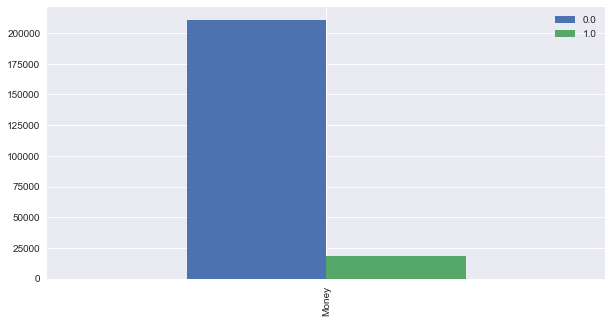

In [115]:
bar_chart_money('GuildJoin')

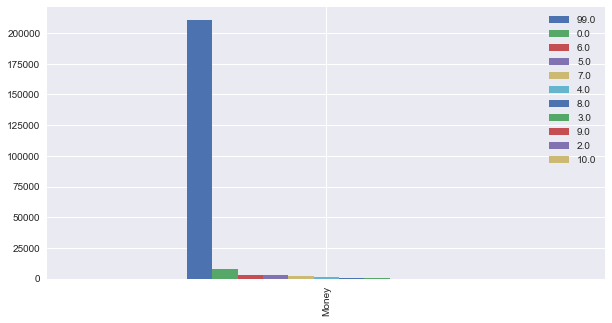

In [116]:
bar_chart_money('GWRankingGrade')

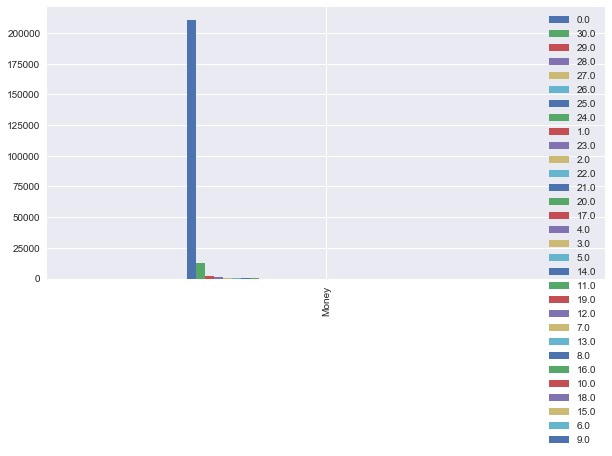

In [117]:
bar_chart_money('MemberCount')

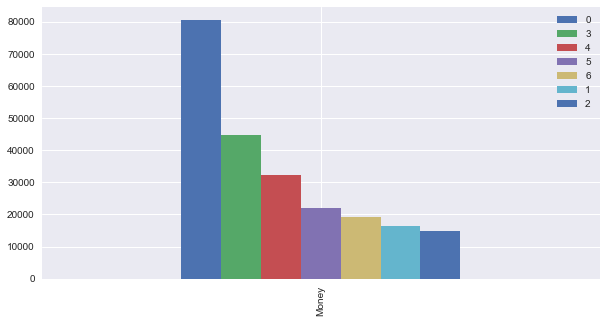

In [118]:
bar_chart_money('DayType')

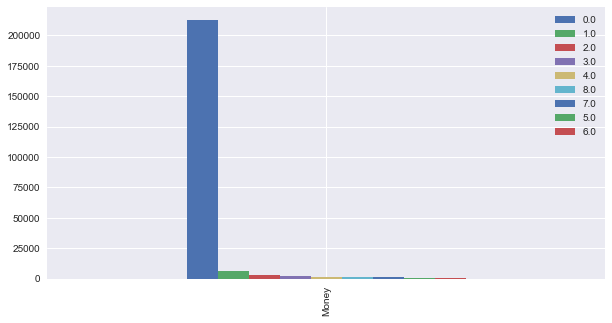

In [119]:
bar_chart_money('GDLastClearStageType')

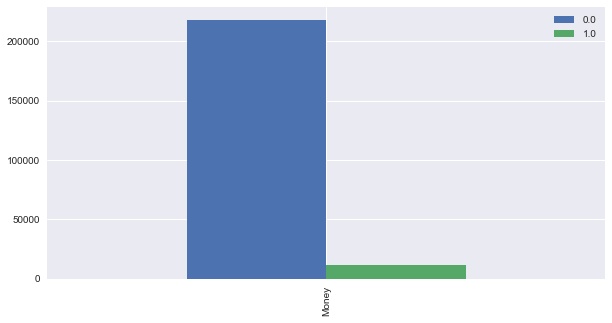

In [120]:
bar_chart_money('monthType')

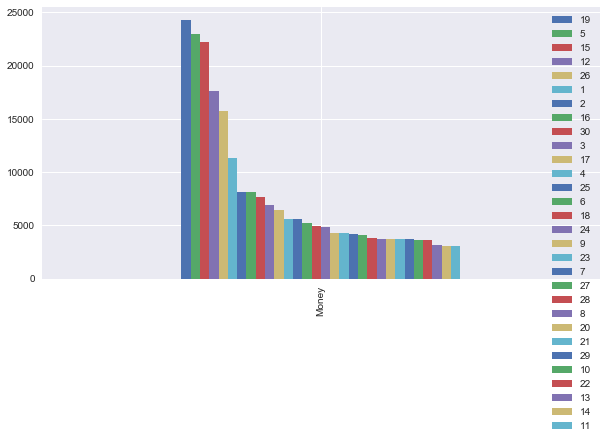

In [121]:
bar_chart_money('Day')

## 

In [122]:
train1.head()

,DateID,AccountUniqueID,GuildIndex,GWRankingGrade,GuildPoint,MemberCount,GDLastClearStageTID,Money,YmdFormat,Day,DayType,monthType,GuildJoin,MoneyType,GDLastClearStageType
0,20170601,422020,243589.0,5.0,345649.0,30.0,21106.0,0,2017-06-01,1,3,1.0,1.0,0.0,1.0
1,20170601,422035,130319.0,5.0,374938.0,30.0,21209.0,0,2017-06-01,1,3,1.0,1.0,0.0,2.0
2,20170601,422051,757274.0,0.0,470942.0,16.0,21201.0,0,2017-06-01,1,3,1.0,1.0,0.0,2.0
3,20170601,422052,244047.0,4.0,2735106.0,27.0,21405.0,0,2017-06-01,1,3,1.0,1.0,0.0,4.0
4,20170601,422064,90705.0,5.0,235803.0,30.0,21208.0,0,2017-06-01,1,3,1.0,1.0,0.0,2.0


In [123]:
train1['MoneyType'].value_counts()

0.0    10577334
1.0      229421
Name: MoneyType, dtype: int64

In [124]:
train1.MemberCount.value_counts()

0.0     10206081
30.0      369720
29.0       69816
28.0       40263
27.0       28050
26.0       17271
25.0       11992
1.0         8522
24.0        4185
2.0         3779
21.0        3079
23.0        3038
22.0        2741
20.0        2689
3.0         2587
15.0        2429
19.0        2395
16.0        2325
18.0        2286
14.0        2168
17.0        2111
12.0        2110
13.0        2088
4.0         2038
9.0         1956
10.0        1943
11.0        1872
8.0         1863
6.0         1838
7.0         1775
5.0         1745
Name: MemberCount, dtype: int64

In [125]:
train_data = train1.drop('MoneyType', axis=1)
target = train1['MoneyType'].head(1000)

train_data.shape, target.shape

((10806755, 14), (1000,))

In [126]:
train_data.head(10)

,DateID,AccountUniqueID,GuildIndex,GWRankingGrade,GuildPoint,MemberCount,GDLastClearStageTID,Money,YmdFormat,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,20170601,422020,243589.0,5.0,345649.0,30.0,21106.0,0,2017-06-01,1,3,1.0,1.0,1.0
1,20170601,422035,130319.0,5.0,374938.0,30.0,21209.0,0,2017-06-01,1,3,1.0,1.0,2.0
2,20170601,422051,757274.0,0.0,470942.0,16.0,21201.0,0,2017-06-01,1,3,1.0,1.0,2.0
3,20170601,422052,244047.0,4.0,2735106.0,27.0,21405.0,0,2017-06-01,1,3,1.0,1.0,4.0
4,20170601,422064,90705.0,5.0,235803.0,30.0,21208.0,0,2017-06-01,1,3,1.0,1.0,2.0
5,20170601,422089,44999.0,6.0,1944531.0,30.0,21109.0,0,2017-06-01,1,3,1.0,1.0,1.0
6,20170601,422096,304006.0,5.0,153263.0,30.0,21206.0,0,2017-06-01,1,3,1.0,1.0,2.0
7,20170601,422105,199587.0,5.0,421552.0,30.0,21306.0,0,2017-06-01,1,3,1.0,1.0,3.0
8,20170601,422120,252919.0,0.0,1135477.0,26.0,21209.0,0,2017-06-01,1,3,1.0,1.0,2.0
9,20170601,422124,155504.0,4.0,223285.0,30.0,21110.0,0,2017-06-01,1,3,1.0,1.0,1.0


In [127]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [128]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806755 entries, 0 to 10806754
Data columns (total 15 columns):
DateID                  int64
AccountUniqueID         int64
GuildIndex              float64
GWRankingGrade          float64
GuildPoint              float64
MemberCount             float64
GDLastClearStageTID     float64
Money                   int64
YmdFormat               datetime64[ns]
Day                     int64
DayType                 int64
monthType               float64
GuildJoin               float64
MoneyType               float64
GDLastClearStageType    float64
dtypes: datetime64[ns](1), float64(9), int64(5)
memory usage: 1.2 GB


In [129]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [130]:
train1.isnull().sum()

DateID                  0
AccountUniqueID         0
GuildIndex              0
GWRankingGrade          0
GuildPoint              0
MemberCount             0
GDLastClearStageTID     0
Money                   0
YmdFormat               0
Day                     0
DayType                 0
monthType               0
GuildJoin               0
MoneyType               0
GDLastClearStageType    0
dtype: int64

In [131]:
train_result = train_data

In [132]:
train_result.head()

,DateID,AccountUniqueID,GuildIndex,GWRankingGrade,GuildPoint,MemberCount,GDLastClearStageTID,Money,YmdFormat,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,20170601,422020,243589.0,5.0,345649.0,30.0,21106.0,0,2017-06-01,1,3,1.0,1.0,1.0
1,20170601,422035,130319.0,5.0,374938.0,30.0,21209.0,0,2017-06-01,1,3,1.0,1.0,2.0
2,20170601,422051,757274.0,0.0,470942.0,16.0,21201.0,0,2017-06-01,1,3,1.0,1.0,2.0
3,20170601,422052,244047.0,4.0,2735106.0,27.0,21405.0,0,2017-06-01,1,3,1.0,1.0,4.0
4,20170601,422064,90705.0,5.0,235803.0,30.0,21208.0,0,2017-06-01,1,3,1.0,1.0,2.0


In [133]:
train_test_data = [train_result,test]

print ( datetime.datetime.now())

for dataset in train_test_data:
    dataset.drop('DateID', axis=1, inplace=True)
    dataset.drop('GuildIndex', axis=1, inplace=True)
    dataset.drop('GDLastClearStageTID', axis=1, inplace=True)
    dataset.drop('YmdFormat', axis=1, inplace=True)
    dataset.drop('AccountUniqueID', axis=1, inplace=True)
    dataset.drop('GuildPoint', axis=1, inplace=True)
    
print ( datetime.datetime.now())

2018-04-20 14:58:49.690940
2018-04-20 14:58:54.707283


In [134]:
train_result.head()

,GWRankingGrade,MemberCount,Money,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,5.0,30.0,0,1,3,1.0,1.0,1.0
1,5.0,30.0,0,1,3,1.0,1.0,2.0
2,0.0,16.0,0,1,3,1.0,1.0,2.0
3,4.0,27.0,0,1,3,1.0,1.0,4.0
4,5.0,30.0,0,1,3,1.0,1.0,2.0


In [135]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: MoneyType, dtype: float64

In [136]:
train_result_all = train_result

In [137]:
train_result = train_result_all.head(1000)

In [138]:
train_result = train_result.drop('Money', axis=1)

In [139]:
train_result

,GWRankingGrade,MemberCount,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,5.0,30.0,1,3,1.0,1.0,1.0
1,5.0,30.0,1,3,1.0,1.0,2.0
2,0.0,16.0,1,3,1.0,1.0,2.0
3,4.0,27.0,1,3,1.0,1.0,4.0
4,5.0,30.0,1,3,1.0,1.0,2.0
5,6.0,30.0,1,3,1.0,1.0,1.0
6,5.0,30.0,1,3,1.0,1.0,2.0
7,5.0,30.0,1,3,1.0,1.0,3.0
8,0.0,26.0,1,3,1.0,1.0,2.0
9,4.0,30.0,1,3,1.0,1.0,1.0


In [140]:
target

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     1.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
970    0.0
971    0.0
972    0.0
973    1.0
974    0.0
975    0.0
976    1.0
977    0.0
978    0.0
979    1.0
980    0.0
981    0.0
982    0.0
983    0.0
984    0.0
985    0.0
986    0.0
987    0.0
988    0.0
989    0.0
990    0.0
991    0.0
992    0.0
993    0.0
994    0.0
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: MoneyType, Length: 1000, dtype: float64

In [141]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: MoneyType, dtype: float64

In [142]:
train_result

,GWRankingGrade,MemberCount,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,5.0,30.0,1,3,1.0,1.0,1.0
1,5.0,30.0,1,3,1.0,1.0,2.0
2,0.0,16.0,1,3,1.0,1.0,2.0
3,4.0,27.0,1,3,1.0,1.0,4.0
4,5.0,30.0,1,3,1.0,1.0,2.0
5,6.0,30.0,1,3,1.0,1.0,1.0
6,5.0,30.0,1,3,1.0,1.0,2.0
7,5.0,30.0,1,3,1.0,1.0,3.0
8,0.0,26.0,1,3,1.0,1.0,2.0
9,4.0,30.0,1,3,1.0,1.0,1.0


In [143]:
train_result.head()

,GWRankingGrade,MemberCount,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,5.0,30.0,1,3,1.0,1.0,1.0
1,5.0,30.0,1,3,1.0,1.0,2.0
2,0.0,16.0,1,3,1.0,1.0,2.0
3,4.0,27.0,1,3,1.0,1.0,4.0
4,5.0,30.0,1,3,1.0,1.0,2.0


### 6.2.1 kNN

In [144]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'

print ( datetime.datetime.now())

score = cross_val_score(clf, train_result, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

print ( datetime.datetime.now())

2018-04-20 14:58:54.951942
[0.93 0.9  0.92 0.94 0.94 0.94 0.87 0.92 0.9  0.9 ]
2018-04-20 14:58:55.000062


In [145]:
# kNN Score
round(np.mean(score)*100, 2)

91.6

### 6.2.2 Decision Tree

In [146]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_result, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93 0.91 0.91 0.94 0.9  0.92 0.87 0.91 0.87 0.89]


In [147]:
# decision tree Score
round(np.mean(score)*100, 2)

90.5

### 6.2.3 Ramdom Forest

In [148]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_result, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.94 0.9  0.91 0.94 0.91 0.94 0.87 0.91 0.88 0.89]


In [149]:
# Random Forest Score
round(np.mean(score)*100, 2)

90.9

### 6.2.4 Naive Bayes

In [150]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_result, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85 0.85 0.83 0.24 0.77 0.94 0.85 0.79 0.75 0.88]


In [151]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.5

### 6.2.5 SVM

In [152]:
print ( datetime.datetime.now())

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_result, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

print ( datetime.datetime.now())

2018-04-20 14:58:55.328937
[0.93 0.92 0.91 0.94 0.96 0.94 0.88 0.92 0.89 0.9 ]
2018-04-20 14:58:55.498388


In [153]:
round(np.mean(score)*100,2)

91.9

## 7. Testing

In [154]:
# 10000 Row
train_result_back = train_result
target_back = target


In [155]:
train_result

,GWRankingGrade,MemberCount,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,5.0,30.0,1,3,1.0,1.0,1.0
1,5.0,30.0,1,3,1.0,1.0,2.0
2,0.0,16.0,1,3,1.0,1.0,2.0
3,4.0,27.0,1,3,1.0,1.0,4.0
4,5.0,30.0,1,3,1.0,1.0,2.0
5,6.0,30.0,1,3,1.0,1.0,1.0
6,5.0,30.0,1,3,1.0,1.0,2.0
7,5.0,30.0,1,3,1.0,1.0,3.0
8,0.0,26.0,1,3,1.0,1.0,2.0
9,4.0,30.0,1,3,1.0,1.0,1.0


In [156]:
target

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     1.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
970    0.0
971    0.0
972    0.0
973    1.0
974    0.0
975    0.0
976    1.0
977    0.0
978    0.0
979    1.0
980    0.0
981    0.0
982    0.0
983    0.0
984    0.0
985    0.0
986    0.0
987    0.0
988    0.0
989    0.0
990    0.0
991    0.0
992    0.0
993    0.0
994    0.0
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: MoneyType, Length: 1000, dtype: float64

In [157]:
train_result = train_result.head(1000)
target = target.head(1000)

In [158]:
target

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     1.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
970    0.0
971    0.0
972    0.0
973    1.0
974    0.0
975    0.0
976    1.0
977    0.0
978    0.0
979    1.0
980    0.0
981    0.0
982    0.0
983    0.0
984    0.0
985    0.0
986    0.0
987    0.0
988    0.0
989    0.0
990    0.0
991    0.0
992    0.0
993    0.0
994    0.0
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: MoneyType, Length: 1000, dtype: float64

In [159]:
test.head()

,GWRankingGrade,MemberCount,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,7.0,30.0,1,3,1.0,1.0,9.0
1,5.0,26.0,1,3,1.0,1.0,7.0
2,7.0,30.0,1,3,1.0,1.0,9.0
3,4.0,30.0,1,3,1.0,1.0,2.0
4,4.0,30.0,1,3,1.0,1.0,1.0


In [160]:
train_result.head()

,GWRankingGrade,MemberCount,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,5.0,30.0,1,3,1.0,1.0,1.0
1,5.0,30.0,1,3,1.0,1.0,2.0
2,0.0,16.0,1,3,1.0,1.0,2.0
3,4.0,27.0,1,3,1.0,1.0,4.0
4,5.0,30.0,1,3,1.0,1.0,2.0


In [161]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: MoneyType, dtype: float64

In [162]:
test.head()

,GWRankingGrade,MemberCount,Day,DayType,monthType,GuildJoin,GDLastClearStageType
0,7.0,30.0,1,3,1.0,1.0,9.0
1,5.0,26.0,1,3,1.0,1.0,7.0
2,7.0,30.0,1,3,1.0,1.0,9.0
3,4.0,30.0,1,3,1.0,1.0,2.0
4,4.0,30.0,1,3,1.0,1.0,1.0


In [163]:
train1['MoneyType'].value_counts()

0.0    10577334
1.0      229421
Name: MoneyType, dtype: int64

In [164]:
target.value_counts()

0.0    919
1.0     81
Name: MoneyType, dtype: int64

In [165]:
target

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     1.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
970    0.0
971    0.0
972    0.0
973    1.0
974    0.0
975    0.0
976    1.0
977    0.0
978    0.0
979    1.0
980    0.0
981    0.0
982    0.0
983    0.0
984    0.0
985    0.0
986    0.0
987    0.0
988    0.0
989    0.0
990    0.0
991    0.0
992    0.0
993    0.0
994    0.0
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: MoneyType, Length: 1000, dtype: float64

In [166]:
clf = SVC()
clf.fit(train_result, target)

prediction = clf.predict(test)

In [167]:
submission = pd.DataFrame({
    "GWRankingGrade": test["GWRankingGrade"],
    "MemberCount"   : test["MemberCount"],
    "Day": test["Day"],
    "DayType": test["DayType"],
    "monthType": test["monthType"],
    "GuildJoin": test["GuildJoin"],
    "GDLastClearStageType": test["GDLastClearStageType"],
    "MoneyType": prediction
})

submission.to_csv('submission.csv', index=False)

In [168]:
submission.head()

,Day,DayType,GDLastClearStageType,GWRankingGrade,GuildJoin,MemberCount,MoneyType,monthType
0,1,3,9.0,7.0,1.0,30.0,0.0,1.0
1,1,3,7.0,5.0,1.0,26.0,0.0,1.0
2,1,3,9.0,7.0,1.0,30.0,0.0,1.0
3,1,3,2.0,4.0,1.0,30.0,0.0,1.0
4,1,3,1.0,4.0,1.0,30.0,0.0,1.0


In [169]:
submission.loc[(submission.MoneyType > 0 )].head()

,Day,DayType,GDLastClearStageType,GWRankingGrade,GuildJoin,MemberCount,MoneyType,monthType
327,1,3,10.0,10.0,1.0,30.0,1.0,1.0
1232,1,3,2.0,4.0,1.0,18.0,1.0,1.0
1939,1,3,10.0,10.0,1.0,30.0,1.0,1.0
2054,1,3,10.0,10.0,1.0,30.0,1.0,1.0
10774,1,3,10.0,10.0,1.0,30.0,1.0,1.0


In [170]:
clf2 = KNeighborsClassifier()
clf2.fit(train_result, target)

prediction2 = clf2.predict(test)

In [171]:
submission2 = pd.DataFrame({
    "GWRankingGrade": test["GWRankingGrade"],
    "MemberCount"   : test["MemberCount"],
    "Day": test["Day"],
    "DayType": test["DayType"],
    "monthType": test["monthType"],
    "GuildJoin": test["GuildJoin"],
    "GDLastClearStageType": test["GDLastClearStageType"],
    "MoneyType": prediction
})

submission2.to_csv('submission2.csv', index=False)

In [172]:
submission2.head()

,Day,DayType,GDLastClearStageType,GWRankingGrade,GuildJoin,MemberCount,MoneyType,monthType
0,1,3,9.0,7.0,1.0,30.0,0.0,1.0
1,1,3,7.0,5.0,1.0,26.0,0.0,1.0
2,1,3,9.0,7.0,1.0,30.0,0.0,1.0
3,1,3,2.0,4.0,1.0,30.0,0.0,1.0
4,1,3,1.0,4.0,1.0,30.0,0.0,1.0


In [173]:
submission2.loc[(submission.MoneyType > 0 )].head()

,Day,DayType,GDLastClearStageType,GWRankingGrade,GuildJoin,MemberCount,MoneyType,monthType
327,1,3,10.0,10.0,1.0,30.0,1.0,1.0
1232,1,3,2.0,4.0,1.0,18.0,1.0,1.0
1939,1,3,10.0,10.0,1.0,30.0,1.0,1.0
2054,1,3,10.0,10.0,1.0,30.0,1.0,1.0
10774,1,3,10.0,10.0,1.0,30.0,1.0,1.0
